In [2]:
import json
from lxml import etree
import re
import base64
from IPython import display

In [3]:
with open("./data/train/train_0.json", "r") as f:
    samples = json.load(f)
    sample = samples[1]

In [4]:
print(len(samples))
print(sample.keys())
print(sample)

100
dict_keys(['website', 'domain', 'subdomain', 'annotation_id', 'confirmed_task', 'action_reprs', 'actions'])
{'website': 'exploretock', 'domain': 'Travel', 'subdomain': 'Restaurant', 'annotation_id': 'a6372f23-f462-4706-8455-5b350c46d83c', 'confirmed_task': 'Book a winery tour in Napa Valley in a winery which serves Mediterranean cuisine with wine testing for 4 guests on April 15, 10 am in a outdoor setup.', 'action_reprs': ['[svg]   -> CLICK', '[svg]   -> CLICK', '[searchbox]  Find a location -> TYPE: NAPA VALLEY', '[span]  Napa Valley -> CLICK', '[combobox]  Reservation type -> SELECT: Wineries', '[svg]   -> CLICK', '[svg]   -> CLICK', '[button]  15 -> CLICK', '[combobox]  Time -> SELECT: 10:00 AM', '[combobox]  Party size -> SELECT: 4 guests', '[svg]   -> CLICK', '[button]  Edit cuisine type filter -> CLICK', '[checkbox]  Mediterranean -> CLICK', '[button]  Submit -> CLICK', '[button]  Open additional search filters -> CLICK', '[checkbox]  Outdoors -> CLICK', '[checkbox]  Wine ta

In [5]:
print("单个数据的字典")
print(sample.keys())
for key in sample.keys():
    if key!="actions":
        if key!="action_reprs":
            print(f"{key}: {sample[key]}")
        else:
            print(f"{key}:")
            for i, action_repr in enumerate(sample[key]):
                print(f"\t{i}. {action_repr}")
                        
print(sample["action_reprs"])

单个数据的字典
dict_keys(['website', 'domain', 'subdomain', 'annotation_id', 'confirmed_task', 'action_reprs', 'actions'])
website: exploretock
domain: Travel
subdomain: Restaurant
annotation_id: a6372f23-f462-4706-8455-5b350c46d83c
confirmed_task: Book a winery tour in Napa Valley in a winery which serves Mediterranean cuisine with wine testing for 4 guests on April 15, 10 am in a outdoor setup.
action_reprs:
	0. [svg]   -> CLICK
	1. [svg]   -> CLICK
	2. [searchbox]  Find a location -> TYPE: NAPA VALLEY
	3. [span]  Napa Valley -> CLICK
	4. [combobox]  Reservation type -> SELECT: Wineries
	5. [svg]   -> CLICK
	6. [svg]   -> CLICK
	7. [button]  15 -> CLICK
	8. [combobox]  Time -> SELECT: 10:00 AM
	9. [combobox]  Party size -> SELECT: 4 guests
	10. [svg]   -> CLICK
	11. [button]  Edit cuisine type filter -> CLICK
	12. [checkbox]  Mediterranean -> CLICK
	13. [button]  Submit -> CLICK
	14. [button]  Open additional search filters -> CLICK
	15. [checkbox]  Outdoors -> CLICK
	16. [checkbox]  Wine t

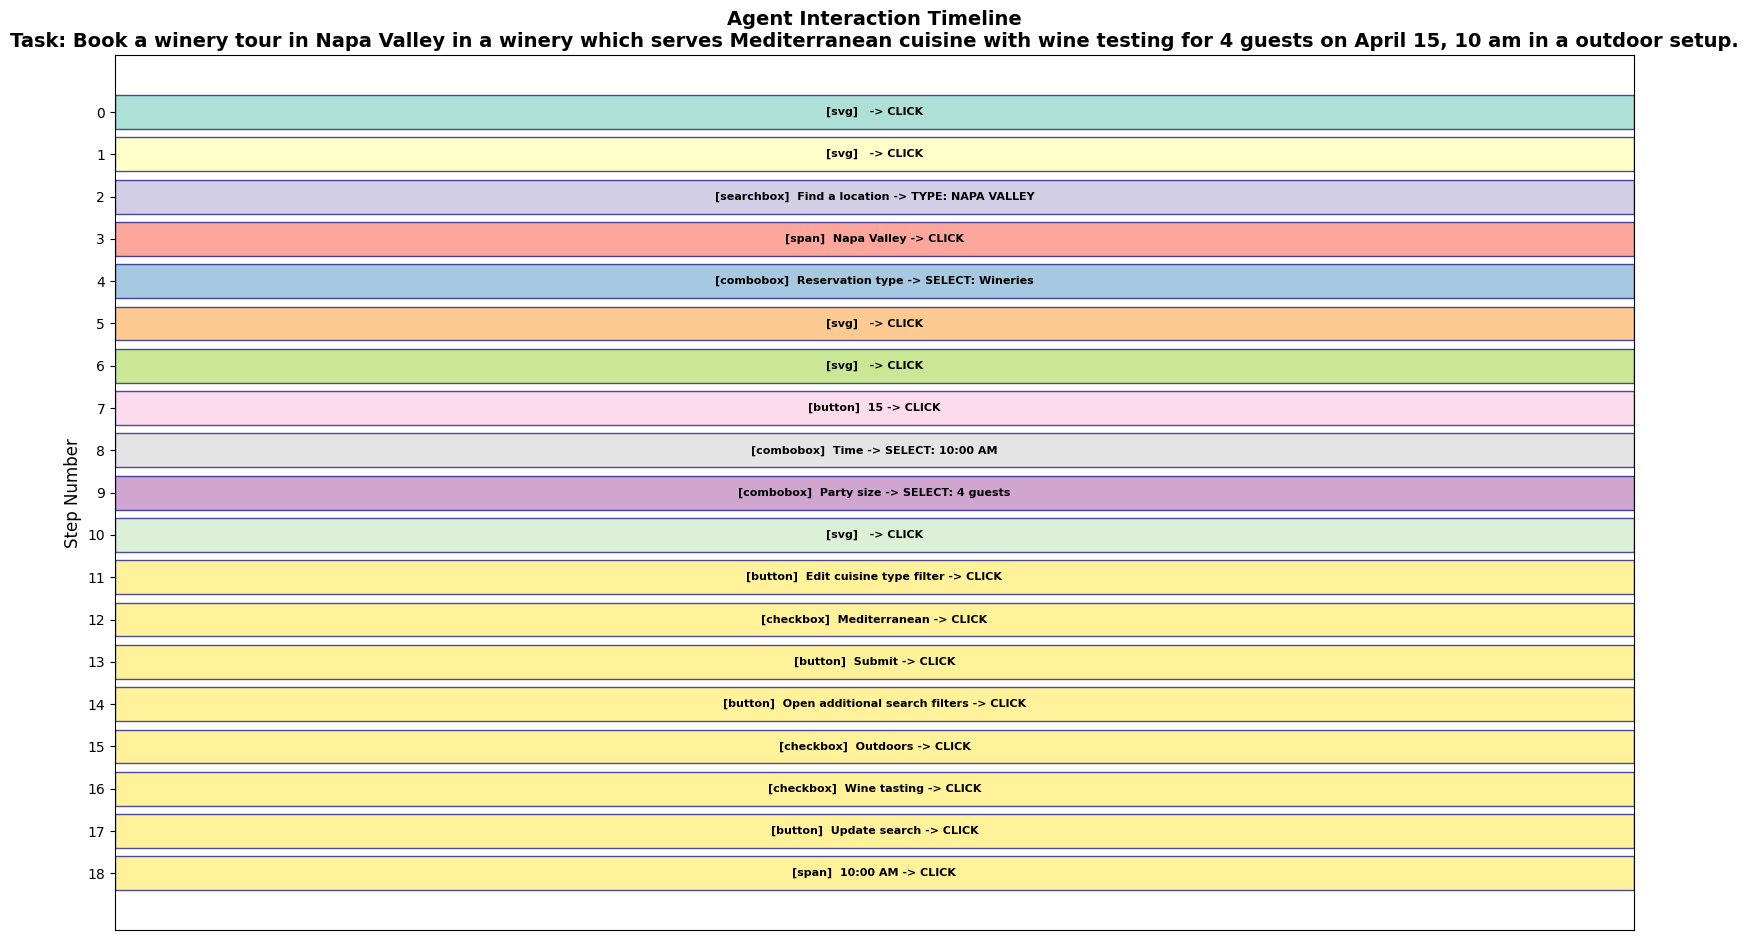


总共 19 个步骤
任务: Book a winery tour in Napa Valley in a winery which serves Mediterranean cuisine with wine testing for 4 guests on April 15, 10 am in a outdoor setup.
网站: exploretock


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 直接使用 sample 中的 action_reprs 数据
action_reprs = sample["action_reprs"]

# 转换为DataFrame
df = pd.DataFrame({
    'Step': range(len(action_reprs)),
    'Action': action_reprs
})

# 使用 matplotlib 绘制交互序列
fig, ax = plt.subplots(figsize=(16, max(8, len(action_reprs) * 0.5)))

# 绘制水平条形图
colors = plt.cm.Set3(range(len(action_reprs)))
bars = ax.barh(df['Step'], [1]*len(df), color=colors, edgecolor='navy', alpha=0.7)

# 在每个条上标注动作
for i, action in enumerate(action_reprs):
    ax.text(0.5, i, action, 
            ha='center', va='center', fontsize=8, fontweight='bold', wrap=True)

# 设置标题和标签
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Step Number', fontsize=12)
ax.set_title(f'Agent Interaction Timeline\nTask: {sample["confirmed_task"]}', 
             fontsize=14, fontweight='bold')
ax.set_yticks(df['Step'])
ax.set_yticklabels(df['Step'])
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.invert_yaxis()  # 让步骤从上到下排列

plt.tight_layout()
plt.show()

print(f"\n总共 {len(action_reprs)} 个步骤")
print(f"任务: {sample['confirmed_task']}")
print(f"网站: {sample['website']}")


In [7]:
import pandas as pd
from datetime import datetime, timedelta

# 从train_0.json中读取所有samples
with open("./data/train/train_0.json", "r") as f:
    all_samples = json.load(f)

print(f"总共有 {len(all_samples)} 个 samples")

# 创建空列表来存储所有行
rows = []

# 遍历每个 sample
for sample_idx, sample in enumerate(all_samples):
    sequence_id = f"seq_{sample_idx + 1}"
    action_reprs = sample.get("action_reprs", [])
    
    # 为每个 action 创建一行数据
    for action_idx, action in enumerate(action_reprs):
        # 生成时间戳（从某个起点开始，每个action递增1秒）
        base_time = datetime(2024, 1, 1) + timedelta(days=sample_idx)
        timestamp = base_time + timedelta(seconds=action_idx + 1)
        
        # 解析 action_repr，通常格式是 "element_type-ACTION_TYPE" 或 "element_type ACTION_TYPE"
        # 提取 event_type（最后一部分通常是动作类型）
        parts = action.split('-') if '-' in action else action.split()
        
        if len(parts) >= 1:
            event_type = parts[-1]  # 取最后一个部分作为event_type
            details = action  # 完整的 action_repr 作为 details
        else:
            event_type = action
            details = action
        
        # 添加到行列表
        rows.append({
            'timestamp': timestamp.strftime("%Y-%m-%d %H:%M:%S"),
            'event_type': event_type,
            'details': action,
            'sequence_id': sequence_id
        })

# 转换为 DataFrame
df = pd.DataFrame(rows)

print("\n生成的数据样本（前20行）：")
print(df.head(20))

# 保存为 CSV 文件
output_csv = "train_0_formatted.csv"
df.to_csv(output_csv, index=False)
print(f"\n✓ 数据已保存到: {output_csv}")
print(f"总共生成了 {len(df)} 行数据，来自 {len(all_samples)} 个 sequences")

总共有 100 个 samples

生成的数据样本（前20行）：
              timestamp           event_type  \
0   2024-01-01 00:00:01     > SELECT: Pickup   
1   2024-01-01 00:00:02              > CLICK   
2   2024-01-01 00:00:03       > TYPE: Boston   
3   2024-01-01 00:00:04              > CLICK   
4   2024-01-01 00:00:05              > CLICK   
5   2024-01-01 00:00:06              > CLICK   
6   2024-01-01 00:00:07    > SELECT: 5:00 PM   
7   2024-01-01 00:00:08              > CLICK   
8   2024-01-01 00:00:09              > CLICK   
9   2024-01-01 00:00:10    > SELECT: 1 guest   
10  2024-01-01 00:00:11              > CLICK   
11  2024-01-02 00:00:01              > CLICK   
12  2024-01-02 00:00:02              > CLICK   
13  2024-01-02 00:00:03  > TYPE: NAPA VALLEY   
14  2024-01-02 00:00:04              > CLICK   
15  2024-01-02 00:00:05   > SELECT: Wineries   
16  2024-01-02 00:00:06              > CLICK   
17  2024-01-02 00:00:07              > CLICK   
18  2024-01-02 00:00:08              > CLICK   
19  20

In [8]:
import subprocess
import os

# 运行 RunAll.py 来生成可视化所需的 JSON 文件
csv_file = "train_0_formatted.csv"
output_dir = "./dataresults/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 构建命令
cmd = [
    "python",
    "RunAll.py",
    "--file", csv_file,
    "--attr", "event_type",
    "--grpattr", "sequence_id",
    "--output", output_dir,
    "--format", "%Y-%m-%d %H:%M:%S"
]

print("运行命令:")
print(" ".join(cmd))
print("\n" + "="*60)

# 执行命令
result = subprocess.run(cmd, capture_output=True, text=True)

print(result.stdout)
if result.stderr:
    print("错误输出:")
    print(result.stderr)

print("="*60)
print("\n✓ 可视化 JSON 文件已生成！")
print("\n接下来需要：")
print("1. 将生成的 JSON 文件复制到: visualization/app/public/assets/")
print("2. 进入 visualization/app 目录")
print("3. 运行 npm start 启动可视化应用")


运行命令:
python RunAll.py --file train_0_formatted.csv --attr event_type --grpattr sequence_id --output ./dataresults/ --format %Y-%m-%d %H:%M:%S


错误输出:
Traceback (most recent call last):
  File "RunAll.py", line 14, in <module>
    from memory_profiler import memory_usage
ModuleNotFoundError: No module named 'memory_profiler'


✓ 可视化 JSON 文件已生成！

接下来需要：
1. 将生成的 JSON 文件复制到: visualization/app/public/assets/
2. 进入 visualization/app 目录
3. 运行 npm start 启动可视化应用
